In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

import re
import string

### Documents Cleanup

In [3]:
df = pd.read_csv('data/article_info_6000.csv')

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df.dropna(subset=['title','description'],inplace=True)

In [13]:
df.head()

,content,description,publishedAt,source,title,url
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11


In [16]:
df['publish_date'] = df.publishedAt.apply(lambda x: x.split('T')[0])
df.head()

,content,description,publishedAt,source,title,url,publish_date
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08


In [63]:
date_counts = df.publish_date.value_counts()

In [79]:
date_counts.set_axis(pd.to_datetime(date_counts.index),inplace=True)

In [81]:
date_counts.sort_index(axis=0,inplace=True)

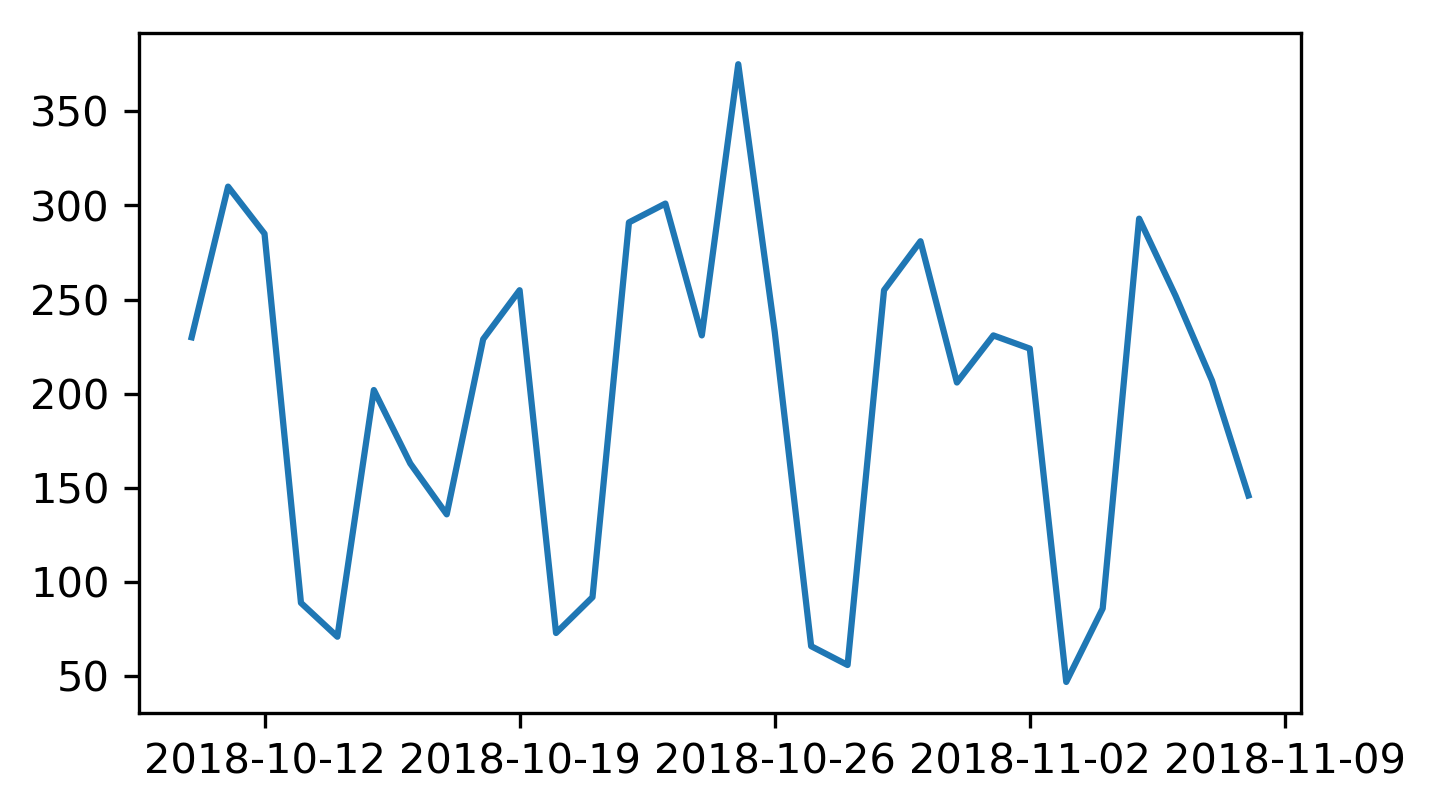

In [196]:
plt.figure(figsize=(5,3),dpi=300)
plt.plot(date_counts.index, date_counts, );

In [143]:
source_counts = df.source.value_counts()
small_media = source_counts[source_counts < 10].index.format()
df.loc[df.source.apply(lambda x: x in small_media), 'source'] = 'Small Media'

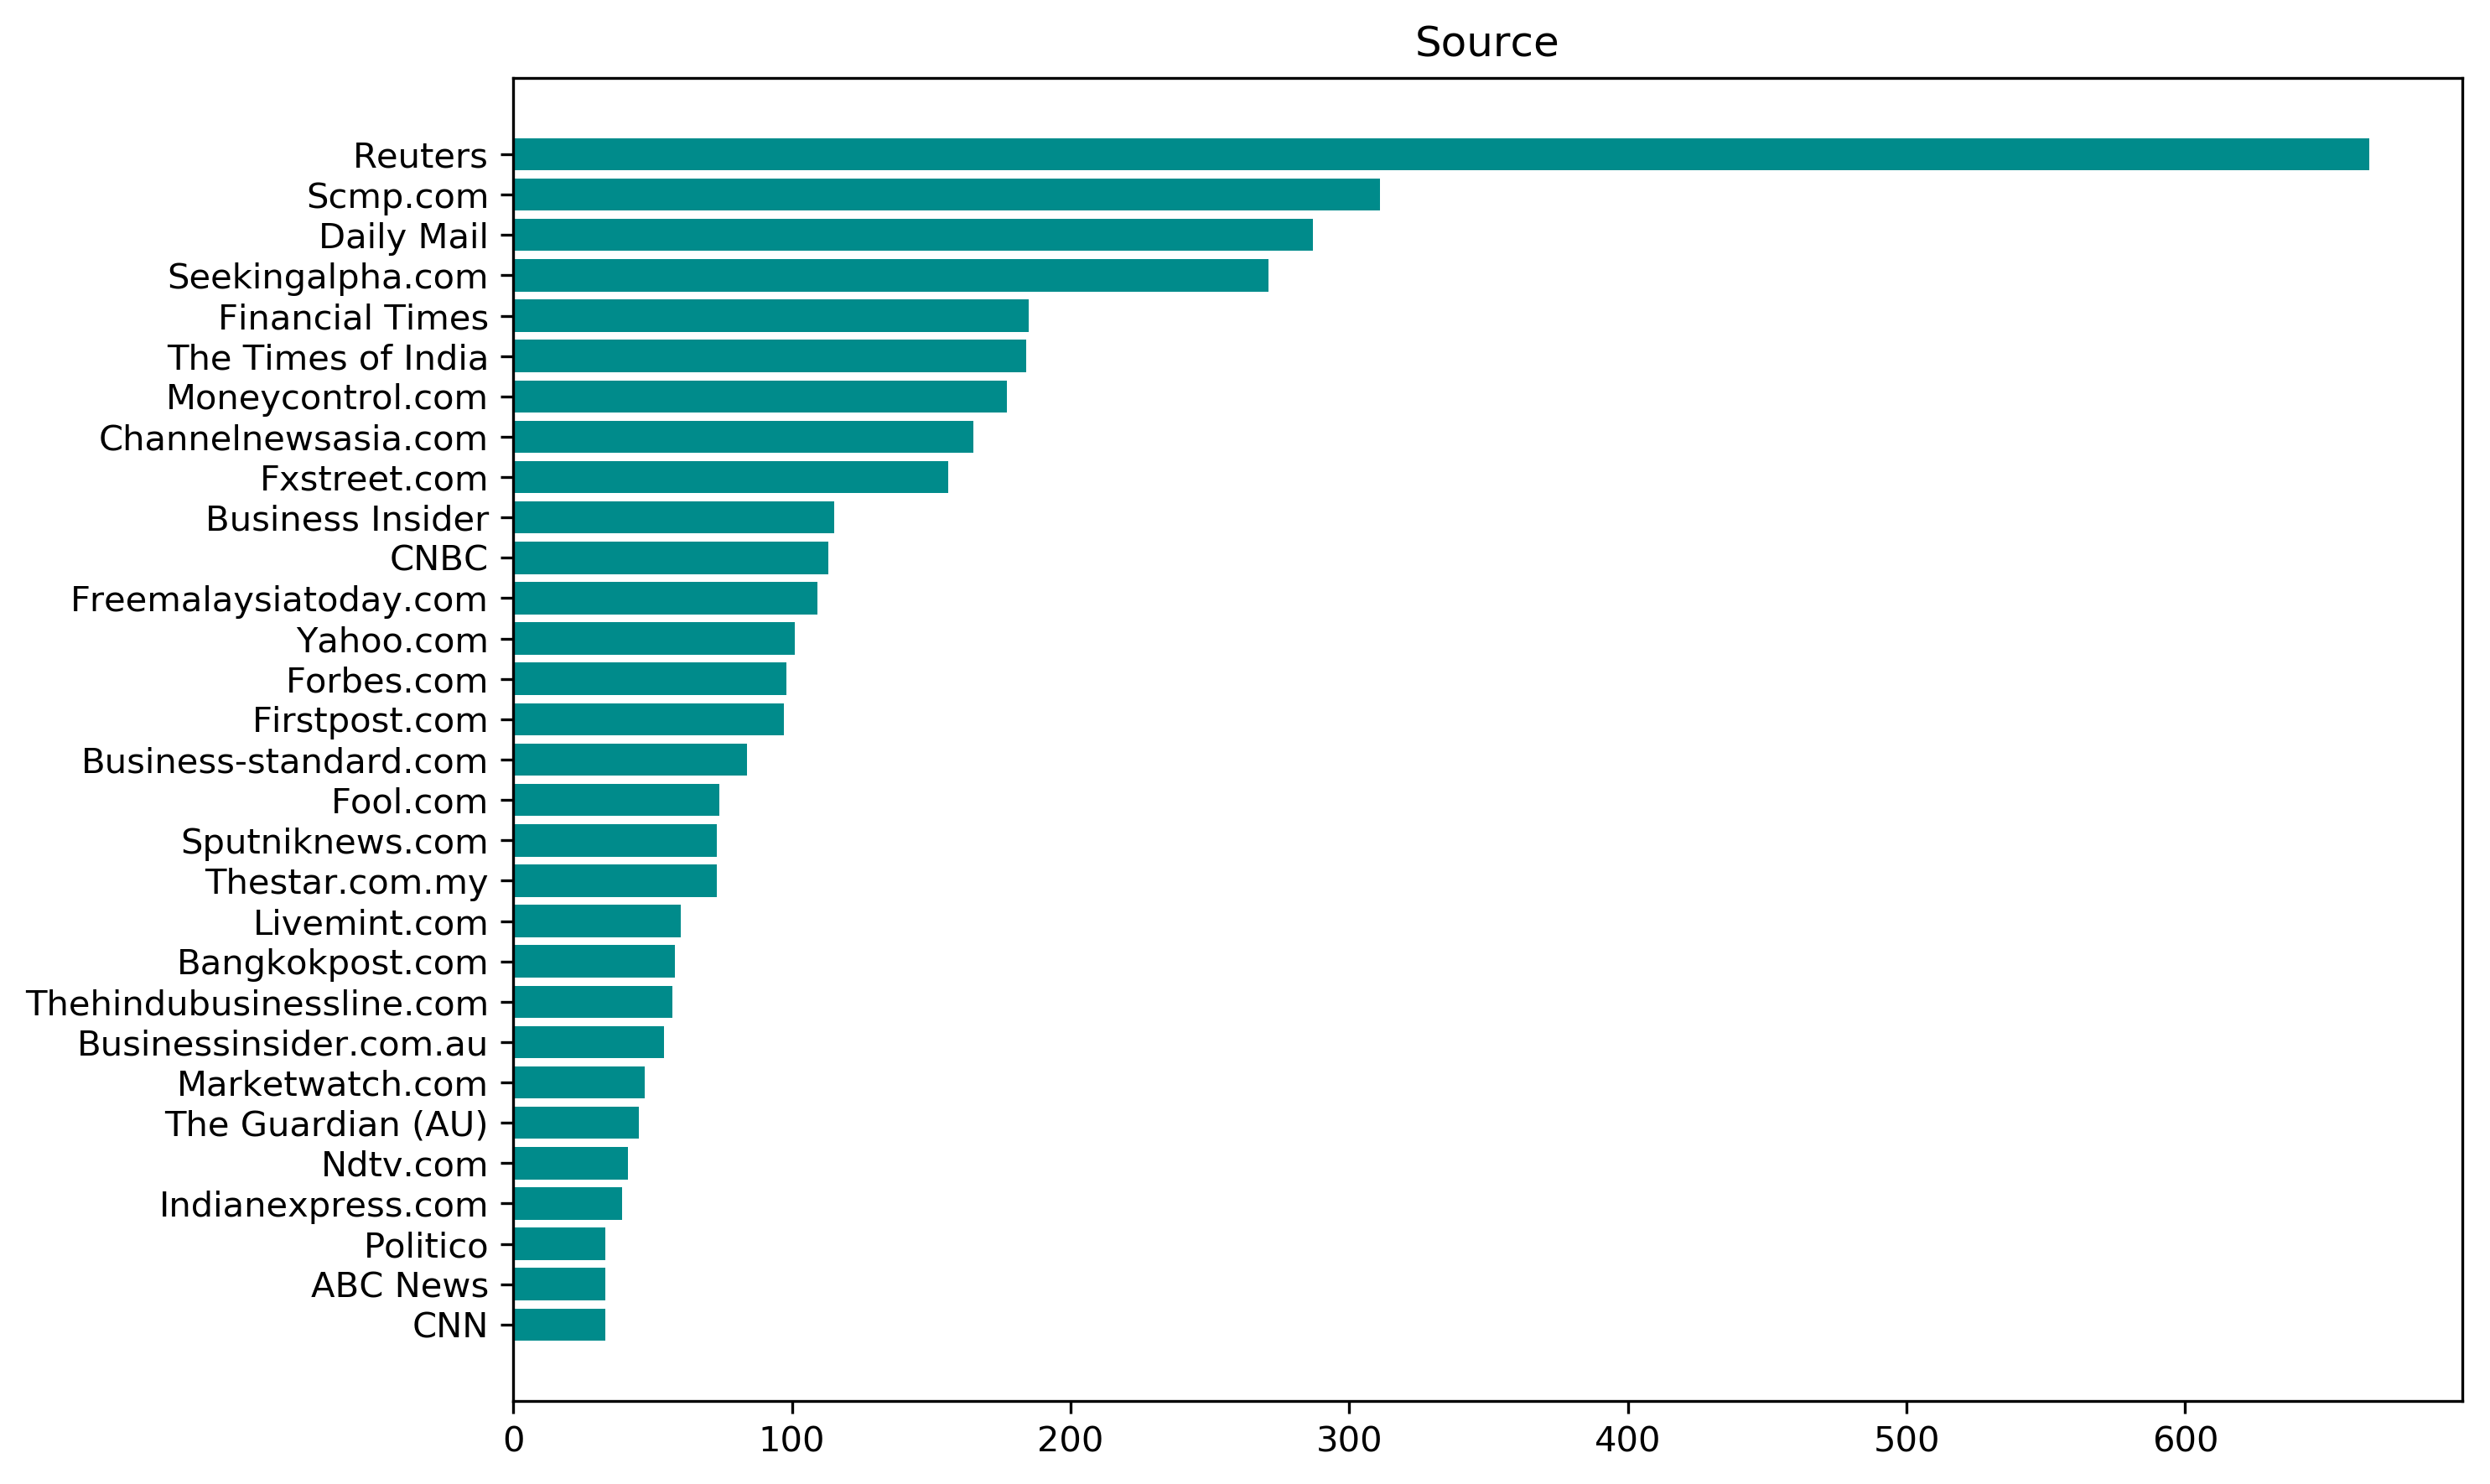

In [210]:
plt.figure(figsize=(10,6), dpi=300)
source_counts = df.source.value_counts()[30:0:-1]
plt.barh(source_counts.index, source_counts,color='darkcyan')
plt.title('Source')
plt.tight_layout();

In [173]:
from textblob import TextBlob

from collections import Counter
from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
more_stopwords = [
    'trade',
    'war',
    'tariffs',
    'us',
    'amid',
    'chinese',
    'china',
    'president',
    'donald',
    'trump',
    'united',
    'states',
    'could',
    'year',
    'reuters',
    'news',
    'xi',
    'jinping',
    'beijing',
    'washington'
]

In [92]:
def cleanup_doc(doc):
    # Replace punctuations with a white space
    doc = re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)
    # Remove all words containing digits
    doc = re.sub('\w*\d\w*', ' ', doc)
    # Keep US as a special term
    doc = re.sub('U.S.', 'US', doc)
    # Change all words into lowercases
    doc = doc.lower()
    # Remove all non English characters
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w.isalpha())
    # Remove stopwords
    stop = stopwords.words('english')
    stop += more_stopwords
    stop = set(stop)
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w not in stop)
    
    return doc

In [93]:
def super_clean(collection):
    clean = []
    for c in collection:
        clean.append(cleanup_doc(c))
    return clean

In [94]:
content = df.title+' '+df.description

In [97]:
orginal_index = content.index # Store the original order 

In [98]:
content = super_clean(content)

In [101]:
len(content)

5916

In [102]:
def find_top_bigrams(collection, num):
    counter = Counter()

    n = 2
    for c in collection:
        words = TextBlob(c).words
        bigrams = ngrams(words, n)
        counter += Counter(bigrams)

    res = []
    for phrase, count in counter.most_common(num):
        res_tuple = (" ".join(phrase), count)
        res.append(res_tuple)
    
    return res

In [103]:
top30 = set(find_top_bigrams(content, 30))
top60 = set(find_top_bigrams(content, 60))
top90 = set(find_top_bigrams(content, 90))

In [104]:
top30

{('appeared first', 84),
 ('asian shares', 141),
 ('asian stocks', 89),
 ('central bank', 90),
 ('economic growth', 157),
 ('emerging markets', 71),
 ('federal reserve', 79),
 ('financial crisis', 100),
 ('first time', 83),
 ('global financial', 71),
 ('global growth', 87),
 ('global markets', 129),
 ('global stocks', 84),
 ('gold prices', 74),
 ('hong kong', 151),
 ('interest rates', 116),
 ('last week', 75),
 ('midterm elections', 126),
 ('need know', 64),
 ('new york', 114),
 ('next month', 69),
 ('oil prices', 238),
 ('per cent', 105),
 ('saudi arabia', 103),
 ('stock market', 186),
 ('stock markets', 130),
 ('tech stocks', 75),
 ('third quarter', 221),
 ('wall st', 67),
 ('wall street', 435)}

In [105]:
list(top60.difference(top30))

[('key quotes', 45),
 ('white house', 47),
 ('york times', 60),
 ('last month', 51),
 ('jones industrial', 42),
 ('shinzo abe', 55),
 ('world two', 42),
 ('street journal', 47),
 ('growth slows', 50),
 ('global economy', 56),
 ('industrial average', 43),
 ('two years', 41),
 ('stock index', 43),
 ('global economic', 45),
 ('month low', 59),
 ('world largest', 44),
 ('foreign policy', 47),
 ('dow jones', 62),
 ('iran sanctions', 53),
 ('prices fall', 42),
 ('rising interest', 47),
 ('since global', 45),
 ('largest economies', 39),
 ('crude oil', 43),
 ('italy budget', 41),
 ('prime minister', 59),
 ('gdp growth', 57),
 ('business insider', 40),
 ('equity markets', 42),
 ('rising supply', 41)]

In [106]:
list(top90.difference(top60))

[('financial markets', 34),
 ('said wednesday', 36),
 ('tax cuts', 36),
 ('south sea', 34),
 ('data showed', 38),
 ('said thursday', 38),
 ('interest rate', 35),
 ('bond yields', 38),
 ('global stock', 39),
 ('north dakota', 33),
 ('two countries', 32),
 ('six months', 33),
 ('asia stocks', 34),
 ('pace since', 39),
 ('aud usd', 34),
 ('sanctions iran', 36),
 ('said friday', 32),
 ('since financial', 37),
 ('silicon valley', 38),
 ('prices rose', 35),
 ('asian markets', 39),
 ('treasury secretary', 32),
 ('stupid thing', 33),
 ('japan nikkei', 32),
 ('world bank', 33),
 ('european shares', 38),
 ('asia shares', 38),
 ('import expo', 35),
 ('asia pacific', 39),
 ('two largest', 37)]

In [144]:
cv = CountVectorizer(
                                strip_accents='ascii',
                                max_df=0.1, 
                                min_df=3,
                                ngram_range=(1,2)
#                                 binary=True
                               )

In [145]:
X = cv.fit_transform(content)

In [148]:
import dill

In [151]:
dill.dump(cv, open('data/vectors/cv', 'wb'))
dill.dump(X, open('data/matrix/X_cv', 'wb'))

In [152]:
X1 = dill.load(open('data/matrix/X_cv', 'rb'))

In [153]:
X1.toarray().sum(0)

array([8, 4, 4, ..., 4, 3, 3])

In [146]:
X.toarray().sum(0)

array([8, 4, 4, ..., 4, 3, 3], dtype=int64)

In [110]:
vocab = np.array(cv.get_feature_names())
counts = X.toarray().sum(0)
vocab[np.argsort(-counts)[:100]]

array(['asia', 'dollar', 'earnings', 'quarter', 'tensions', 'business',
       'day', 'third', 'higher', 'next', 'may', 'report', 'wednesday',
       'concerns', 'gold', 'october', 'top', 'last', 'tech', 'bank',
       'oct', 'years', 'billion', 'one', 'high', 'time', 'financial',
       'rising', 'companies', 'post', 'september', 'hit', 'fears', 'back',
       'japan', 'oil prices', 'sales', 'fell', 'demand', 'fall',
       'expected', 'deal', 'elections', 'third quarter', 'american',
       'biggest', 'gains', 'would', 'set', 'low', 'foreign', 'impact',
       'policy', 'according', 'exports', 'worries', 'end', 'largest',
       'state', 'government', 'ahead', 'european', 'index', 'lower',
       'data', 'midterm', 'country', 'strong', 'rates', 'sell',
       'stock market', 'despite', 'apple', 'investment', 'months', 'key',
       'points', 'per', 'yuan', 'interest', 'currency', 'talks', 'tax',
       'international', 'india', 'company', 'saudi', 'shanghai', 'likely',
       'countr

In [111]:
counts

array([8, 4, 4, ..., 4, 3, 3], dtype=int64)

In [112]:
from collections import Counter

countfreq = np.array(Counter(counts).most_common()).T

In [113]:
[countfreq[0,:20]]

[array([ 3,  4,  5,  6,  7,  8,  9, 10, 12, 11, 13, 15, 14, 18, 16, 19, 17,
        20, 21, 22], dtype=int64)]

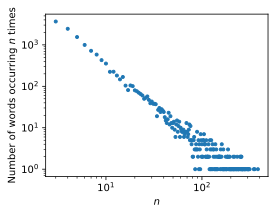

In [114]:
%config InlineBackend.figure_format = 'svg'
plt.figure(dpi=200,figsize=(4,3))
plt.plot(*countfreq,'.',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$n$")
plt.ylabel("Number of words occurring $n$ times")
plt.savefig('bubble_countfreq.svg');

### LDA Dimension Reduction

In [115]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [169]:
n_components = 20

lda = LatentDirichletAllocation(n_components=n_components, 
                                learning_method='online',
                                learning_decay = 0.6,
                                batch_size = 256,
                                learning_offset=512,
                                topic_word_prior = 0.01,
                                random_state=0)

lda.fit(X)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.6,
             learning_method='online', learning_offset=512,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=0.01,
             total_samples=1000000.0, verbose=0)

In [170]:
lda.perplexity(X)

5546.715470292283

In [171]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
chiefs urge
volatility
fibre
valuable
northeastern brazil
sub
reversed
nosedive
finance ministers
global internet

TOPIC 1
dollars goods
billions dollars
hunnicutt nerijus
bin
modern
operating southern
slows exports
long haul
hunt
soybean imports

TOPIC 2
confidence boosting
fair monday
recovery earnings
relations
newly
fears broadening
market despite
russia seeks
repeatedly
fourth

TOPIC 3
know reportedly
needs adjusted
third japan
negative economic
cramer lightning
election inspired
sends
notable
imported goods
third week

TOPIC 4
growth cooled
economic adviser
economy care
world second
said likely
says leaders
new delhi
quarter losing
first daughter
next six

TOPIC 5
warming
stockmarkets
shares expected
warn
street opened
investors braced
asian countries
dollar bond
week underscored
prices edged

TOPIC 6
saw record
bmw announced
takes hit
control congress
saw russians
arabia
vice
foreign carmakers
jokowi
since economic

TOPIC 7
take majority
elections due
midterm vote
says l

In [165]:
from pyLDAvis import sklearn
from pyLDAvis import display

In [172]:
viz=sklearn.prepare(lda, X, cv, R=20)
display(viz)

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [121]:
from sklearn.preprocessing import normalize

In [122]:
w = lda.transform(X)

In [123]:
w = w[:,:15]

In [124]:
w_normalized = normalize(w,axis=1,norm='l1')

In [125]:
cols = ['stock market', 
        'agriculture', 
        'hongkong macau oversea bridge', 
        'crude oil&LV', 
        'asia investment', 
        'gold', 
        'spies', 
        'brexit', 
        'aviation tech steal',
        'taiwan strait defense',
        'car', 
        'factory location', 
        'negative effects', 
        'xinjiang oppression', 
        'ivanka' ]
doc_topic_prob = pd.DataFrame(w_normalized,columns=cols)

In [126]:
doc_topic_prob.head(10)

,stock market,agriculture,hongkong macau oversea bridge,crude oil&LV,asia investment,gold,spies,brexit,aviation tech steal,taiwan strait defense,car,factory location,negative effects,xinjiang oppression,ivanka
0,0.001047,0.001047,0.001047,0.001047,0.001047,0.001047,0.001047,0.001047,0.001047,0.001047,0.985340,0.001047,0.001047,0.001047,0.001047
1,0.001481,0.001481,0.001481,0.001481,0.001481,0.001481,0.001481,0.001481,0.979259,0.001481,0.001481,0.001481,0.001481,0.001481,0.001481
2,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.987215,0.000913,0.000913,0.000913,0.000913,0.000913
3,0.008941,0.008941,0.008941,0.008941,0.008941,0.008941,0.008941,0.008941,0.874825,0.008941,0.008941,0.008941,0.008941,0.008941,0.008941
4,0.004005,0.004005,0.004005,0.004005,0.004005,0.004005,0.215426,0.004005,0.004005,0.139390,0.004005,0.597124,0.004005,0.004005,0.004005
5,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
6,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.000867,0.987862
7,0.000948,0.986730,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948
8,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.981457,0.001325,0.001325,0.001325
9,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667


In [127]:
doc_topic_prob.shape

(5916, 15)

### Sentiment Analysis

In [128]:
df_sentiment = pd.DataFrame(columns = ['polarity', 'subjectivity'])

In [129]:
for i in range(len(content)):
#     print(TextBlob(content[i]).sentiment)
    df_sentiment.loc[i,'polarity'] = TextBlob(content[i]).sentiment.polarity
    df_sentiment.loc[i,'subjectivity'] = TextBlob(content[i]).sentiment.subjectivity

In [130]:
df_sentiment = df_sentiment.astype(float)

In [131]:
df_sentiment['topic'] = ''
for i in range(doc_topic_prob.shape[0]):
    topic = ''
    dominant = doc_topic_prob.loc[i].nlargest(1)
    if dominant.values >= 0.1:
        df_sentiment.loc[i,'topic'] = dominant.index.format()[0]
    else:
        df_sentiment.loc[i,'topic'] = 'others'

In [132]:
df_sentiment.polarity_1 = 0

In [133]:
neg = df_sentiment.polarity <= -0.05
df_sentiment.loc[neg,'polarity_1'] = -1

In [134]:
pos = df_sentiment.polarity >= 0.2
df_sentiment.loc[pos,'polarity_1'] = 1

In [135]:
df_sentiment.head(25)

,polarity,subjectivity,topic,polarity_1
0,-0.312500,0.687500,car,-1.0
1,0.200000,0.200000,aviation tech steal,1.0
2,0.165000,0.260000,taiwan strait defense,NaN
3,0.015625,0.187500,aviation tech steal,NaN
4,-0.036061,0.400909,factory location,NaN
5,0.080000,0.113333,others,NaN
6,-0.025000,0.250000,ivanka,NaN
7,-0.015909,0.230303,agriculture,NaN
8,0.050000,0.191667,factory location,NaN
9,0.000000,0.000000,others,NaN


In [136]:
df_sentiment.topic.value_counts()

others                           2058
ivanka                            780
asia investment                   752
gold                              460
factory location                  366
taiwan strait defense             222
stock market                      194
car                               165
spies                             161
crude oil&LV                      152
aviation tech steal               140
brexit                            135
negative effects                  118
hongkong macau oversea bridge     108
agriculture                       104
xinjiang oppression                 1
Name: topic, dtype: int64

In [137]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 0 to 5915
Data columns (total 4 columns):
polarity        5916 non-null float64
subjectivity    5916 non-null float64
topic           5916 non-null object
polarity_1      2224 non-null float64
dtypes: float64(3), object(1)
memory usage: 391.1+ KB


In [138]:
df_effect = df_sentiment.groupby('topic')['polarity','polarity_1'].mean().sort_values('polarity_1',ascending=False)

In [139]:
df_effect

,polarity,polarity_1
topic,,
aviation tech steal,0.097383,0.343750
hongkong macau oversea bridge,0.114242,0.280000
ivanka,0.077818,0.142857
crude oil&LV,0.060229,-0.016393
spies,0.060528,-0.017544
brexit,0.047834,-0.054545
car,0.034797,-0.078947
asia investment,0.048686,-0.096447
factory location,0.035285,-0.107143


In [140]:
import seaborn as sns

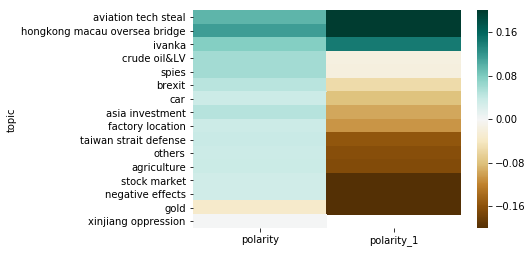

In [142]:
%config InlineBackend.figure_format = 'png'
sns.heatmap(df_effect,cmap='BrBG',vmin = -0.2, vmax = 0.2);